In [339]:
from facenet_models import FacenetModel

# this will download the pretrained weights (if they haven't already been fetched)
# which should take just a few seconds
model = FacenetModel()

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)


In [340]:
import numpy as np
class Profile:
    def __init__(self, name: str, descriptor):
        self.name = name
        self.descriptors = [descriptor]

    def add_descriptor(self, descriptor):
        self.descriptors.append(descriptor)
    
        
        

In [341]:
import pickle

def load_db(path="db.pickle"):
    try:
        with open(path, mode="rb") as opened_file:
            return pickle.load(opened_file)
    except FileNotFoundError:
        return {}
    

    


In [334]:
def add_face(descriptors, name, db):
    if name in db:
        profile = db[name]
        profile.add_descriptor(descriptors)
        db[name] = profile
        
    else:
        profile = Profile(name=name,descriptor=descriptors)
        db[name] = profile
    
    with open("db.pickle", "wb") as opened_file:
        pickle.dump(db, opened_file)
    

In [335]:
def remove_face(name, db):
    del face_db[name]
    with open("db.pickle", "wb") as opened_file:
        pickle.dump(db, opened_file)


In [342]:
face_db = load_db() 

[ WARN:0@6473.773] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


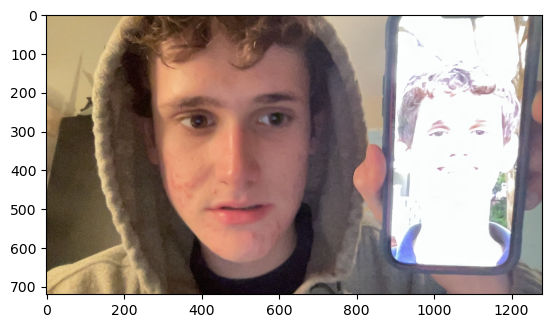

In [348]:
from camera import take_picture
import matplotlib.pyplot as plt
img_array = take_picture()
fig,ax = plt.subplots()
ax.imshow(img_array)

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
boxes, probabilities, landmarks = model.detect(img_array)

# producing a face descriptor for each face
# returns a (N, 512) array, where N is the number of boxes
# and each descriptor vector is 512-dimensional



descriptors = model.compute_descriptors(img_array, boxes)
names=["Gordie","Andrew"]

for i, descriptor in enumerate(descriptors):
    add_face(descriptor, names[i], face_db) 





In [349]:
for name, profile in face_db.items():
    print(f"Name: {name}")
    print(f"Descriptors: {profile.descriptors}")

Name: Gordie
Descriptors: [array([-2.49220822e-02, -9.57500562e-02, -1.67915877e-02,  3.67012694e-02,
        5.03083430e-02,  1.09900171e-02,  3.95486504e-02,  5.98770864e-02,
        3.63924284e-03, -3.66722583e-03,  2.43929233e-02,  7.89021626e-02,
        1.92934703e-02, -1.67347733e-02, -9.50698406e-02,  1.66331425e-01,
        4.49487614e-03,  6.25483971e-03, -4.40494716e-02, -3.27434763e-02,
       -3.99069376e-02, -5.54932728e-02, -3.30849364e-02,  1.14908312e-02,
       -5.98152122e-03, -4.28432338e-02, -5.99428490e-02, -2.54143979e-02,
       -6.33858517e-02,  1.29047679e-02, -4.89388779e-02, -6.78235069e-02,
        1.43688135e-02, -6.02916554e-02, -6.65689111e-02,  3.34619172e-02,
        6.74643666e-02, -4.53456044e-02, -2.86369696e-02, -3.68757173e-02,
        2.24351976e-02,  5.25812842e-02,  1.31306741e-02, -3.39013822e-02,
        2.25342885e-02,  7.07039684e-02,  9.66628175e-03,  2.85052927e-03,
        3.13439853e-02,  3.11326142e-02, -1.72372223e-04, -1.27321798e-02

In [ ]:
def cos_distances(d1,d2):
    